# ***Importing the data***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

data_matrix_scaled = np.load('data_matrix_scaled.npy')
digits = np.load('digits.npy')

# ***Is PCA accurate enough ? (Variance analysis)***

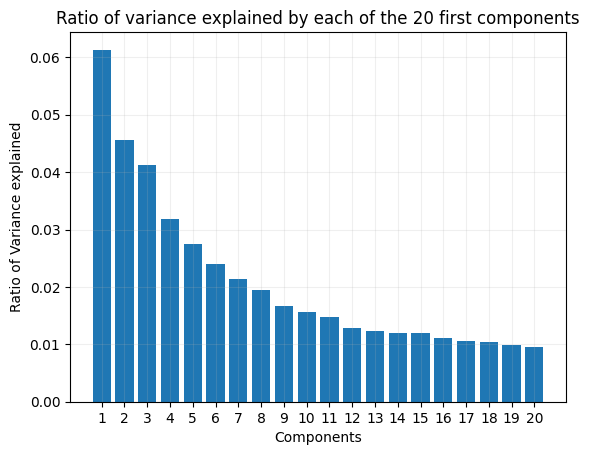

In [ ]:
#instantiate a PCA object
pca_object = PCA()

#feed the model with our data (already scaled)
pca_object.fit(data_matrix_scaled)

#plotting the ratio of variance explained by each component
plt.bar([i for i in range(1,len(pca_object.explained_variance_ratio_[:20])+1)],pca_object.explained_variance_ratio_[:20])
plt.xticks([i for i in range(1,len(pca_object.explained_variance_ratio_[:20])+1)])
plt.title('Ratio of variance explained by each of the 20 first components')
plt.ylabel('Ratio of Variance explained')
plt.xlabel('Components')
plt.grid(True,alpha=0.2)
plt.show()

# ***2-Principal component analysis...does not well***

[[ -0.92366466  -4.72901823]
 [  8.66850467  -7.08182837]
 [  2.18464237  10.65684944]
 ...
 [ -2.00962974 -10.08176912]
 [  0.964129    -2.95962196]
 [ -2.09575189   0.25079941]]


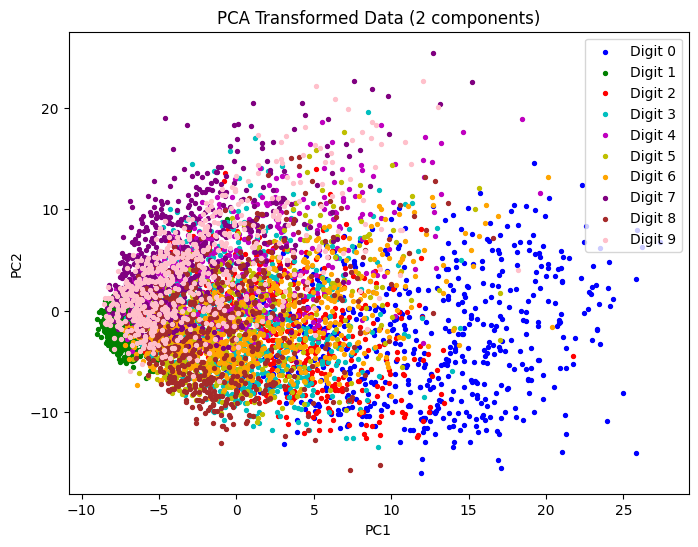

In [ ]:
pca_2 = PCA(n_components=2)

transformed = pca_2.fit_transform(data_matrix_scaled)

print(transformed)

#Define colors for each digit
colors = ['b','g','r','c','m','y','orange','purple','brown','pink']

plt.figure(figsize=(8, 6))

for digit in range(10):
    mask = digits == digit
    plt.scatter(transformed[mask, 0], transformed[mask, 1],
                c=colors[digit], s=8, label=f'Digit {digit}')

#plot
plt.legend()
plt.title('PCA Transformed Data (2 components)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

The 2-dimensional embeddings of the 6000 digits do not allow us to partition them into distinct clusters : most of the embeddings are mixed together. Instead, we will compute higher dimensional-embeddings and perform cluster analysis to see if they allow us to partition the data distinctly.

# ***KMeans and Spectral clustering on 3-dimensional embeddings***

In [ ]:
from sklearn.cluster import KMeans, SpectralClustering

model_pca_3 = PCA(n_components=3)
data_3_components = model_pca_3.fit_transform(data_matrix_scaled)
print(data_3_components)

kmeans_model_3 = KMeans(n_clusters=10)
kmeans_model_3.fit_predict(data_3_components)

ct_kmeans_3 = pd.crosstab(kmeans_model_3.labels_, digits)

print(ct_kmeans_3)

[[ -0.92361097  -4.72837388  -0.22113997]
 [  8.66852141  -7.08179811  -4.17657399]
 [  2.18461053  10.6553398   -4.67810999]
 ...
 [ -2.00967101 -10.08291911  -1.29718169]
 [  0.96416534  -2.95961415   0.35255849]
 [ -2.09575239   0.25097399  -8.7730017 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0      217    0    7    0    3    0    3    0    3    0
1       26    4  169  184   19   80  146    1  110    9
2        1    0    1    3  216   37    0  232   16  208
3        4  653   36   66   43   32  118   47   98   39
4        0    5    8   30  168   20    2  231   31  214
5      156    0  157   71    4   51  105    2   29    3
6        3    0    9   12  114   16    9  130   19  104
7        2    3  145  120    3   28   20    1   24    1
8      153    0    6    5   17   17   46    0   12    4
9       30    6   43  117   36  233  159    7  209   19


In [ ]:
spectral_model_3 = SpectralClustering(n_clusters=10,affinity = 'nearest_neighbors',n_neighbors=15,assign_labels='discretize')
spectral_model_3.fit(data_3_components)

print(spectral_model_3.labels_)

[5 2 0 ... 5 8 1]


In [ ]:
ct_spectral_3 = pd.crosstab(spectral_model_3.labels_, digits)

print(ct_spectral_3)

col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0       11    0   12   17  171   28   11  221   31  147
1        2    0    1    3  196   34    0  205   13  170
2      147    1  169  128    4   65  121    2   58    0
3        0  336    5   15   10    0   10   25   14    5
4        1  296    1    2    0    0   16    0   12    1
5       16   10   15   50   50  228   95   11  176   39
6        0    5    3   16  149   12    0  180   21  224
7       24    4  229  192    6   62   86    1   52    3
8       19   19  132  185   26   77  229    6  168    7
9      372    0   14    0   11    8   40    0    6    5


# ***KMeans and Spectral clustering on 4-dimensional embeddings***

In [ ]:
model_pca_4 = PCA(n_components=4)
data_4_components = model_pca_4.fit_transform(data_matrix_scaled)
print(data_4_components)

kmeans_model_4 = KMeans(n_clusters=10)
kmeans_model_4.fit_predict(data_4_components)

ct_kmeans_4 = pd.crosstab(kmeans_model_4.labels_, digits)

print(ct_kmeans_4)

[[ -0.92361549  -4.72838204  -0.22124782  -7.28507142]
 [  8.66853162  -7.08176254  -4.17732722  -1.33084624]
 [  2.18462378  10.65550512  -4.67659021   0.65941005]
 ...
 [ -2.00963002 -10.0825097   -1.29531329  -6.50568108]
 [  0.96415439  -2.95963934   0.35232094   7.34389229]
 [ -2.09578642   0.25057107  -8.77347511  -1.78864555]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0       11  660   50   57   60   90   88   53  140   48
1        2    0    1    2  228   60    0  231   15  224
2        1    2  185    2    7    6  119    0    1    2
3       12    1   79  284    2   82    2    1   87    6
4        6    0    7    9  114   14    4  134   16  103
5      247    0   45    4    2    2    4    0   11    1
6       91    3   61  207    0  203    6    2  215    2
7      198    0    5    3   15   14    8    0   13    5
8        4    5   14   35  156   26    0  228   50  210
9       20    0  134    5   39   17  377    2    3    0


In [ ]:
spectral_model_4 = SpectralClustering(n_clusters=10,affinity = 'nearest_neighbors',n_neighbors=15,assign_labels='discretize')
spectral_model_4.fit(data_4_components)

print(spectral_model_3.labels_)

[5 2 0 ... 5 8 1]


In [ ]:
ct_spectral_4 = pd.crosstab(spectral_model_4.labels_, digits)

print(ct_spectral_4)

col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0        9    0    9    9  172   14   10  179   15  134
1        7    3  207    4   17    8  551    0    2    1
2        1  304    4    6    0    1    7    0   21    0
3      418    0   20    0    2    7    7    0   10    5
4       20    9   16    6  195  131   13   19   72   62
5        0  338    4    9   11    2    4   24   12    4
6        0    0    0    1   90   23    0  233   12  173
7       98    5   90  203    0  182    7    4  206    4
8        0    6    3   29  133   20    0  190   44  210
9       39    6  228  341    3  126    9    2  157    8


The data seems not to be clustered distinctly. We can conclude that PCA is not efficient here for partitionning this $784$-dimensional data properly into 3 or 4 dimensions. We'll try to tune a KNN model to see if it is able to properly classifiy the digits when they are reduced to 4 dimensional objects.
We now compute the 4 dimensional embeddings of our validation and test data, which we'll save for our KNN notebook

In [ ]:
test_data_matrix_scaled = np.load('test_data_matrix_scaled.npy')
validation_data_matrix_scaled = np.load('validation_data_matrix_scaled.npy')

test_data_4d = model_pca_4.transform(test_data_matrix_scaled)
validation_data_4d = model_pca_4.transform(validation_data_matrix_scaled)

print(test_data_4d)
print(validation_data_4d)

[[  0.49089299  12.5028169  -11.1363424   -2.85260456]
 [  4.60227956  11.24083816  -2.51719839   3.38866707]
 [ 12.13627091 -15.42682852  -9.37952985  -5.51797296]
 ...
 [ -5.39615521   3.24594982  -1.95675027  -1.61084687]
 [ -6.0179414   -1.29725719  -7.90186427  -0.03316026]
 [ -1.22919317   0.77100378   5.26202616  -9.59746557]]
[[18.67036633 -3.40136083 -8.1141929   0.55274791]
 [-6.0218409   2.41480464  2.76175894 -0.59464236]
 [-6.90580541 -5.77440958  4.90744944 -0.38998803]
 ...
 [-7.98178254 -1.74070648  3.79574654  0.7122531 ]
 [-2.48510951  6.87381926 -6.54655284 -0.86513873]
 [-3.94879115  2.45315655  4.68889563 -1.80338611]]


# ***PCA and Clustering : 10 dimensions***

In [ ]:
model_pca_10 = PCA(n_components=10)
data_10_components = model_pca_10.fit_transform(data_matrix_scaled)
print(data_10_components)

kmeans_model_10 = KMeans(n_clusters=10)
kmeans_model_10.fit_predict(data_10_components)

ct_kmeans_10 = pd.crosstab(kmeans_model_10.labels_, digits)

print(ct_kmeans_10)

[[ -0.92361044  -4.72856495  -0.22121612 ...   0.63671518   0.55578575
    0.26947773]
 [  8.66851104  -7.08185343  -4.17712803 ...   2.46170777   0.53328168
   -2.70173812]
 [  2.184642    10.65606793  -4.67767488 ...   6.2448365    1.28934063
    0.12434061]
 ...
 [ -2.00964565 -10.08237268  -1.29576997 ...  -2.10362854   7.64117917
   -1.96519332]
 [  0.96414421  -2.95972421   0.35218375 ...   5.42101416   0.97772446
   -1.46383096]
 [ -2.095787     0.25068823  -8.77362204 ...   1.08723806   0.47096896
   -1.2288664 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0       61    2  196  153    2   13    1    0   22    1
1        5    3  195   41    4    7   57    2    8    1
2        3  657   77   56   42   35   57   58   90   40
3        6    5   18   16  349   33   15   99   30  249
4      372    0    1    0    3    6   17    1    5    4
5       68    0   38  302    0  162    4    0  184   12
6        0    0    8   17   67   15    1   75   20   57
7        0    0    3    8   11    3    0  402    9  200
8       31    4    9   10  136  231    7   14  182   36
9       46    0   36    5    9    9  449    0    1    1
